# Additive Model
An additive model suggests that the components are added together as follows:

$$y(t) = Level + Trend + Seasonality + Noise$$

An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

We can create a time series comprised of a linearly increasing trend from 1 to 99 and some random noise and decompose it as an additive model.

Because the time series was contrived and was provided as an array of numbers, we must specify the frequency of the observations (the freq=1 argument). If a Pandas Series object is provided, this argument is not required.


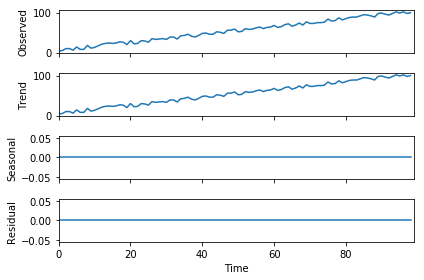

In [8]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose


series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()


# Multiplicative Model
A multiplicative model suggests that the components are multiplied together as follows:

$$y(t) = Level \cdot Trend \cdot Seasonality \cdot Noise$$
A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

In [116]:
series = [randrange(1, 10)*i**2.0 for i in range(1,100)]

result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
pyplot.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

# Airline Passengers Dataset

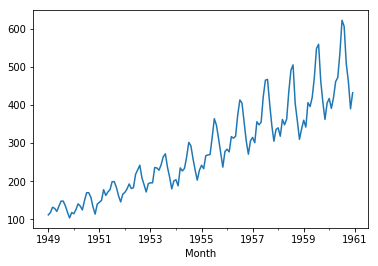

In [13]:
from pandas import Series
from matplotlib import pyplot
import os
cwd = os.getcwd()

series = Series.from_csv(cwd+'/airline-passengers.csv', header=0)
series.plot()
pyplot.show()

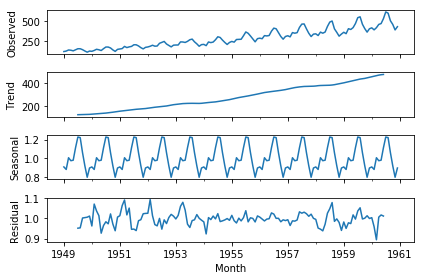

In [14]:
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

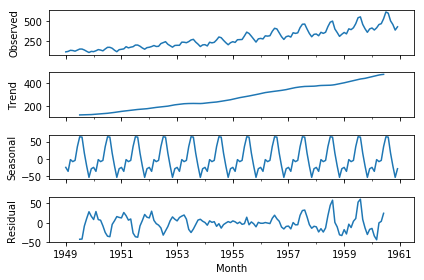

In [15]:
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

144


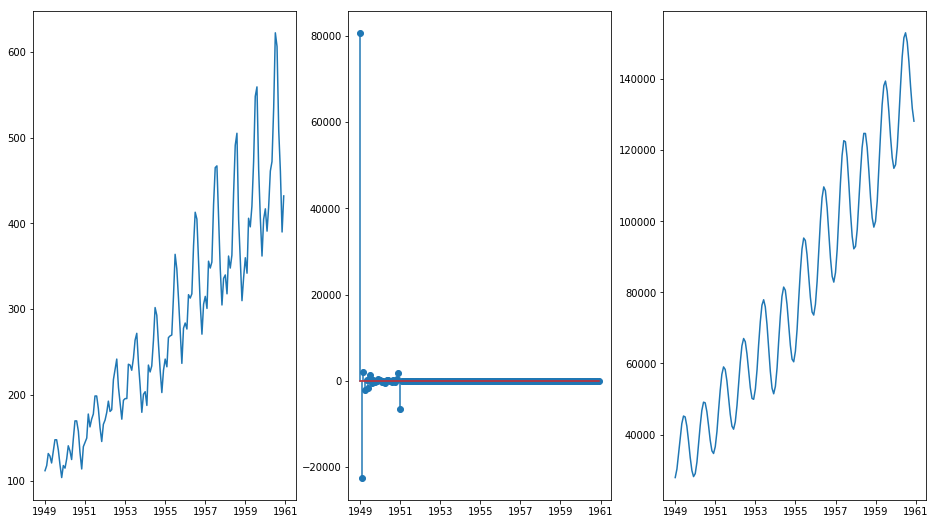

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

d = 25

x = series.index#range(n)
y = series.values#x + np.sin(x)

print y.shape[0]

features = dct(y)[0:d]

y_reconstructed = np.concatenate((features, np.zeros(y.shape[0]-d)))

fig, ax = plt.subplots(0, figsize=(16, 9))

ax = plt.subplot(1, 3, 1)
ax = plt.plot(series.index, series.values)
ax = plt.axis('on')

ax = plt.subplot(1, 3, 2)
ax = plt.stem(series.index, y_reconstructed)
ax = plt.axis('on')

ax = plt.subplot(1, 3, 3)
ax = plt.plot(x, idct(y_reconstructed))
ax = plt.axis('on')


plt.show()

Automatically created module for IPython interactive environment
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97

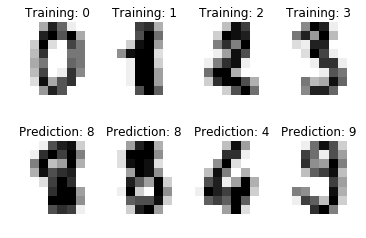

In [63]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

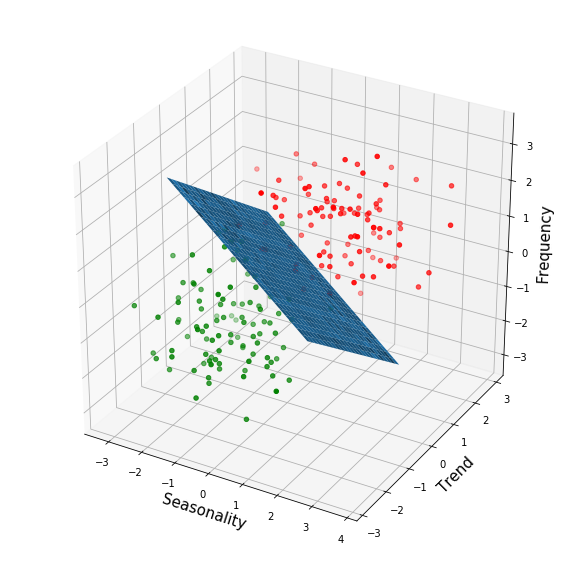

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

rs = np.random.RandomState(1234)

# Generate some fake data.
n_samples = 200
# X is the input features by row.
X = np.zeros((200,3))
X[:n_samples/2] = rs.multivariate_normal( np.ones(3), np.eye(3), size=n_samples/2)
X[n_samples/2:] = rs.multivariate_normal(-np.ones(3), np.eye(3), size=n_samples/2)
# Y is the class labels for each row of X.
Y = np.zeros(n_samples); Y[n_samples/2:] = 1

# Fit the data with an svm
svc = SVC(kernel='linear')
svc.fit(X,Y)

# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should solve for the last coordinate
# to plot the plane in terms of x and y.

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure(figsize=(10, 10))
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y), antialiased=True)
ax.scatter3D(X[Y==0,0], X[Y==0,1], X[Y==0,2], c='Red')
ax.scatter3D(X[Y==1,0], X[Y==1,1], X[Y==1,2], c='Green')

ax.set_xlabel('Seasonality', fontsize=15)
ax.set_ylabel('Trend', fontsize=15)
ax.set_zlabel('Frequency', fontsize=15)

plt.savefig('SVM_example-3D.pdf')
plt.savefig('SVM_example-3D.png')
plt.show()

In [356]:
from scipy import stats as sts

def computeFeatures(arr, windowsize, class_id):
    l = np.shape(arr)[0]
    _arrs = np.array_split(arr, l//windowsize)
    
    _V = np.array([np.var(a) for a in _arrs])
    _S = np.array([sts.skew(a) for a in _arrs])
    _K = np.array([sts.kurtosis(a) for a in _arrs])
    _E = np.array([sts.entropy(a) for a in _arrs])
    _C = class_id*np.ones(l//windowsize, dtype = np.int)#Class
    
    d = {'Variance': _V, 'Skewness': _S, 
         'Curtosis': _K, 'Entropy': _E, 'Class': _C}
    
    return pd.DataFrame(data=d)

s = 100000
arr_1 = np.random.normal(5, 2, s)
arr_2 = np.random.normal(5, 2, s)
arr_3 = np.random.normal(5, 2, s)
#arr_2 = np.random.poisson(1, s)

features_class_1 = computeFeatures(arr_1, 200, 1)
features_class_2 = computeFeatures(arr_2, 200, 2)

# SVM

In [357]:
import pandas as pd  
import numpy as np
import os
import matplotlib.pyplot as plt  
%matplotlib inline

In [358]:
cwd = os.getcwd()
bankdata = pd.read_csv(cwd+'/bill_authentication.csv')  

## Exploratory Data Analysis

In [366]:
bankdata.head()

from scipy import stats as sts

def computeFeatures(arr, windowsize, class_id):
    l = np.shape(arr)[0]
    _arrs = np.array_split(arr, l//windowsize)
    
    _V = np.array([np.var(a) for a in _arrs])
    _S = np.array([sts.skew(a) for a in _arrs])
    _K = np.array([sts.kurtosis(a) for a in _arrs])
    _E = np.array([np.mean(a) for a in _arrs])#np.array([sts.entropy(a) for a in _arrs])
    _C = class_id*np.ones(l//windowsize, dtype = np.int)#Class
    
    d = {'Variance': _V, 'Skewness': _S, 
         'Curtosis': _K, 'Entropy': _E, 'Class': _C}
    
    return pd.DataFrame(data=d)

s = 100000
arr_1 = np.random.normal(5, 2, s)
arr_2 = np.random.poisson(1, s)

features_class_1 = computeFeatures(arr_1, 200, 0)
features_class_2 = computeFeatures(arr_2, 200, 1)

data = pd.concat([features_class_1, features_class_2])
                 
#bankdata = pd.concat([features_class_1, features_class_2])
#bankdata.head()



## Data Preprocessing

In [367]:
#X = bankdata.drop('Class', axis=1)
#y = bankdata['Class']

X = data.drop('Class', axis=1)
y = data['Class']

print "Dataset : {} lines, {} features".format(X.shape[0], X.shape[1])


Dataset : 1000 lines, 4 features


In [368]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Training the Algorithm

In [369]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Making Predictions

In [370]:
y_pred = svclassifier.predict(X_test)  

# Evaluating the Algorithm

In [371]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[ 93   0]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00       107

   micro avg       1.00      1.00      1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Plot the data

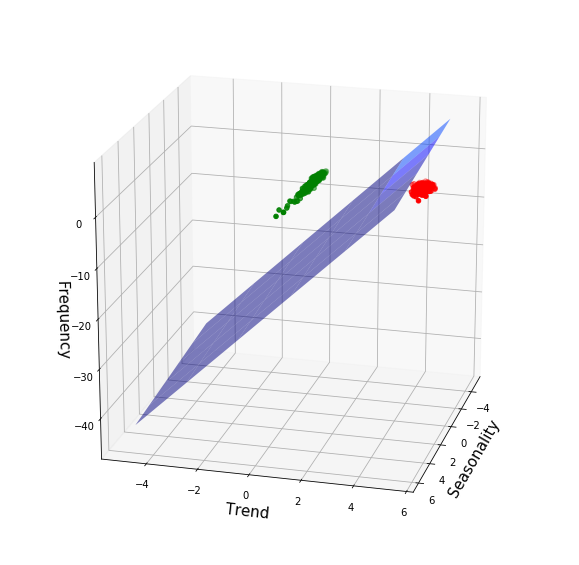

In [373]:
# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should solve for the last coordinate
# to plot the plane in terms of x and y.

_X = X.drop('Variance', axis=1).values
_Y = y.values

_z = lambda _x, _y: (-svclassifier.intercept_[0]-svclassifier.coef_[0][0]*_x-svclassifier.coef_[0][1]*_y) / svclassifier.coef_[0][2]

tmp = np.linspace(-5, 5, 50)
_x, _y = np.meshgrid(tmp, tmp)

# Plot stuff.
fig = plt.figure(figsize=(10, 10))
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(_x, _y, _z(_x, _y),
                cmap='jet',
                antialiased=True, alpha=0.5,
                vmin=0,
                rstride=10,
                cstride=10,
                vmax=10)
ax.scatter3D(_X[_Y==0,0], _X[_Y==0,1], _X[_Y==0,2], c='Red')
ax.scatter3D(_X[_Y==1,0], _X[_Y==1,1], _X[_Y==1,2], c='Green')

ax.set_xlabel('Seasonality', fontsize=15)
ax.set_ylabel('Trend', fontsize=15)
ax.set_zlabel('Frequency', fontsize=15)

# Set rotation angle to 30 degrees
ax.view_init(azim=15, elev=20)
#plt.savefig('SVM_example-3D.pdf')
#plt.savefig('SVM_example-3D.png')
plt.show()